In [3]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
Fs = 256

In [4]:
#Зчитування сигналів
math_healthy = scipy.io.loadmat('Downloads\\lab2\\eeg_healthy_1.mat')
math_sick = scipy.io.loadmat ('Downloads\\lab2\\eeg_sick_1.mat')

In [12]:
#Тривалість сигналів
def duration(Signal, Fs):
    Ts = 1/Fs
    sig_duration = len(Signal)/Fs
    t = np.arange(0, sig_duration, Ts)
    return sig_duration, t
duration(math_healthy, Fs)

(0.015625, array([0.        , 0.00390625, 0.0078125 , 0.01171875]))

In [13]:
duration(math_sick, Fs)

(0.015625, array([0.        , 0.00390625, 0.0078125 , 0.01171875]))

In [4]:
#Збереження сигналів
sig_healthy = np.array (math_healthy['sig'][0])
sig_sick = np.array (math_sick['sig'][0])
from scipy.io import savemat
eegdict1 = {"healthy":sig_healthy}
savemat("eeg_healthy.mat", eegdict1)
eegdict2 = {"sick":sig_sick}
savemat("eeg_sick.mat", eegdict2)

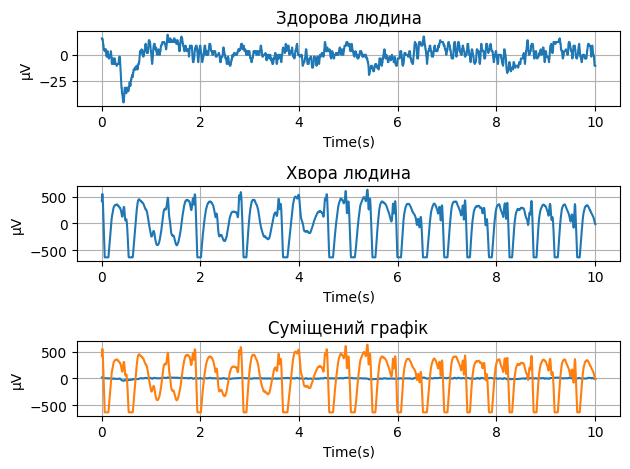

In [5]:
#Побудова графіків
fig = plt.figure()
plots = [fig.add_subplot(311+i) for i in range(3)]

t1 = np.linspace(0, len(sig_healthy)/Fs, len(sig_healthy))
t2 = np.linspace(0, len(sig_sick)/Fs, len(sig_sick))

plots[0].plot(t1, sig_healthy)
plots[0].set_title('Здорова людина')

plots[1].plot(t2, sig_sick)
plots[1].set_title('Хвора людина')

plots[2].set_title('Суміщений графік')
plots[2].plot(t1, sig_healthy)
plots[2].plot(t2, sig_sick)

for plot in plots:
    plot.set_xlabel("Time(s)")
    plot.set_ylabel("μV")
    plot.grid()
    fig.tight_layout()